In [1]:
import pandas as pd
import plotly.graph_objs as go

In [6]:
# read in the data

df = pd.read_csv('../assets/usa-2011-agriculture.csv')
df.shape

(50, 17)

In [7]:
# each row is a state
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [8]:
# missing data?
df.isnull().sum()

code             0
state            0
category         0
total exports    0
beef             0
pork             0
poultry          0
dairy            0
fruits fresh     0
fruits proc      0
total fruits     0
veggies fresh    0
veggies proc     0
total veggies    0
corn             0
wheat            0
cotton           0
dtype: int64

In [9]:
# make a list of columns
list_of_columns=list(df.columns)
list_of_columns.remove('state')
list_of_columns.remove('category')
list_of_columns.remove('code')
list_of_columns

['total exports',
 'beef',
 'pork',
 'poultry',
 'dairy',
 'fruits fresh',
 'fruits proc',
 'total fruits',
 'veggies fresh',
 'veggies proc',
 'total veggies',
 'corn',
 'wheat',
 'cotton']

In [12]:
# data objects
go.Bar
go.Scatter
go.Pie
go.Choropleth

# figure objects
go.Format
go.Figure


plotly.graph_objs._choropleth.Choropleth

In [13]:
data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = df['corn'], # Data to be color-coded
    colorscale = ['lightgrey','blue'],
    colorbar_title = 'some title',
)
data

Choropleth({
    'colorbar': {'title': {'text': 'some title'}},
    'colorscale': [[0.0, 'lightgrey'], [1.0, 'blue']],
    'locationmode': 'USA-states',
    'locations': array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
                        'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
                        'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
                        'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
                        'WI', 'WY'], dtype=object),
    'z': array([  34.9,    0. ,    7.3,   69.5,   34.6,  183.2,    0. ,   26.9,    3.5,
                  57.8,    0. ,   24. , 2228.5, 1123.2, 2529.8,  457.3,  179.1,   91.4,
                   0. ,   54.1,    0. ,  381.5, 1264.3,  110. ,  428.8,    5.4, 1735.9,
                   0. ,    0. ,   10.1,   11.2,  106.1,   92.2,  236.1,  535.1,   27.5,
                  11.7,  112.1,    0. ,   32.1,  643.6,   8

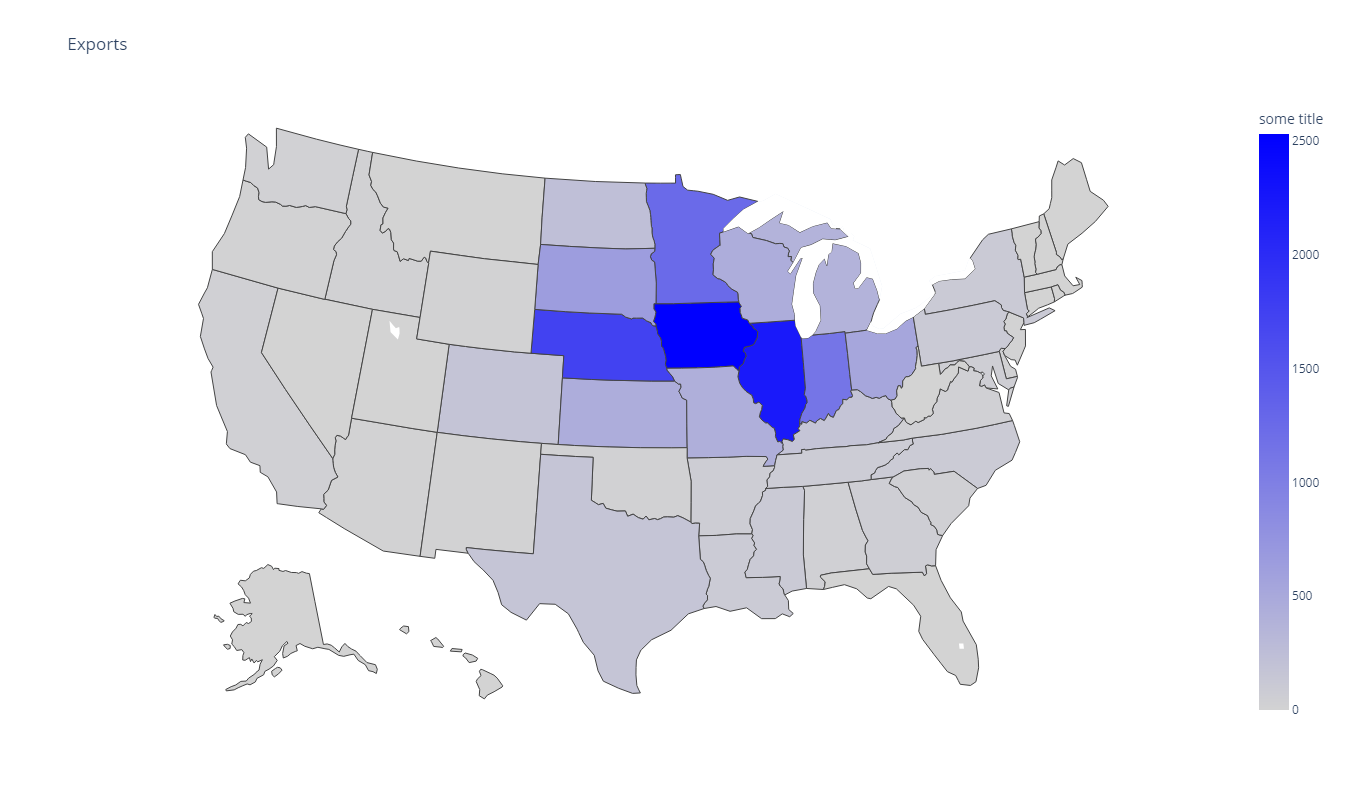

In [15]:
fig = go.Figure([data])
fig.update_layout(
        title_text = 'Exports',
        geo_scope='usa',
        width=1200,
        height=800
    )
fig.write_html('iowa-corn.html')
fig

In [17]:
# make a function that can intake any varname and produce a map.
def make_figure(varname):
    myheading1 = f"Wow! That's a lot of {varname}!"
    mygraphtitle = f'2011 {varname} exports, by state'
    mycolorscale = 'ylorrd' # Note: The error message will list possible color scales.
    mycolorbartitle = "Millions USD"

    data=go.Choropleth(
        locations=df['code'], # Spatial coordinates
        locationmode = 'USA-states', # set of locations match entries in `locations`
        z = df[varname].astype(float), # Data to be color-coded
        colorscale = mycolorscale,
        colorbar_title = mycolorbartitle,
    )


    fig = go.Figure(data)
    fig.update_layout(
        title_text = mygraphtitle,
        geo_scope='usa',
        width=1200,
        height=800
    )
    return fig

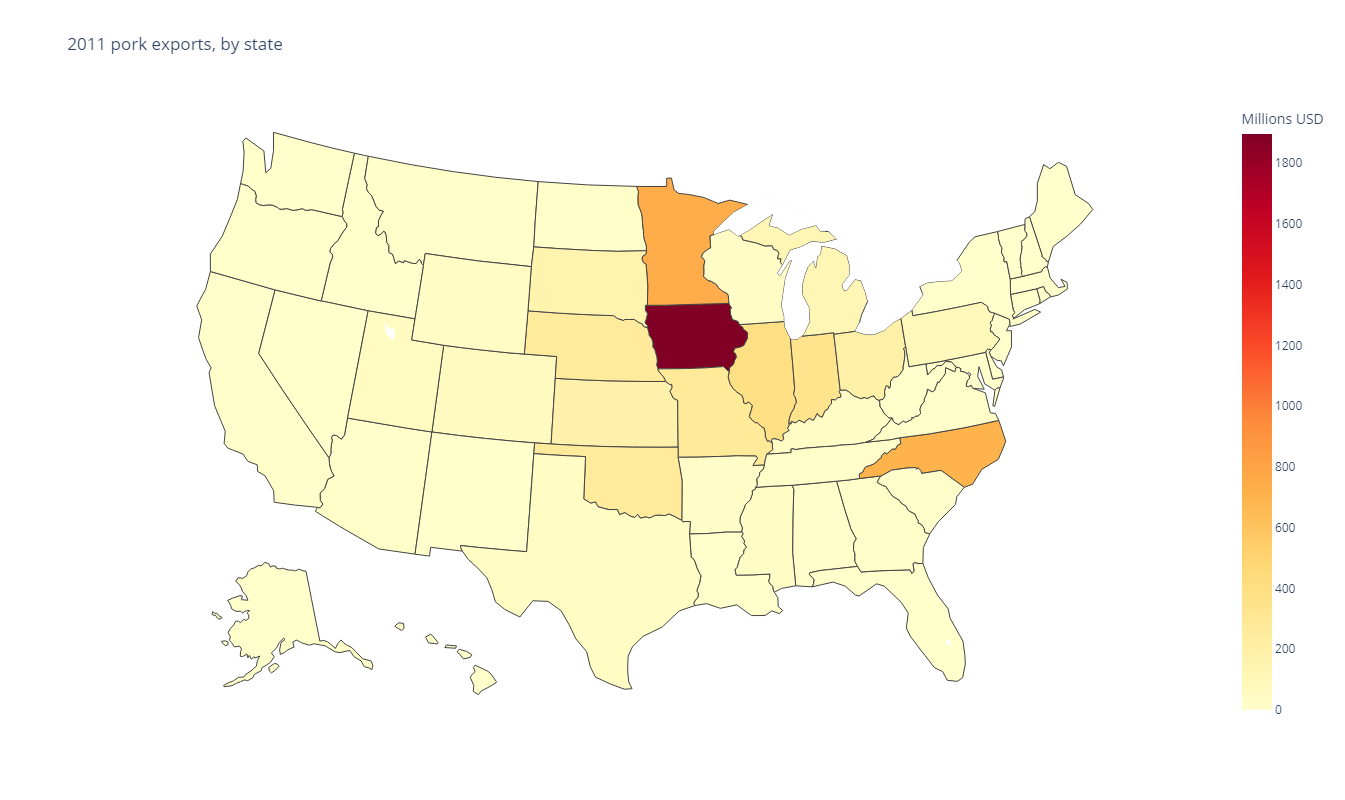

In [22]:
fig=make_figure('beef')
fig